__Title__: OpenAI gym tutorial  
__Author__: Pablo Carrera Flórez de Quiñones  
__License__:  GNU General Public License v3.0  

# Preliminary Work

## Reinforcement Learning

## OpenAI gym tutorial

OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. There are two basic concepts in reinforcement learning: the environment (namely, the outside world) and the agent (namely, the algorithm). The agent sends actions to the environment, and the environment replies with observations and rewards. This gym open-source library gives access to a standardized set of environments, but makes no assumptions about the structure of the agent, it is compatible with any numerical computation library, such as TensorFlow or Theano.

OpenAI Gym include many different enviroments:
* __Classic control and toy text__: complete small-scale tasks, mostly from the RL literature. They’re here to get you started.
* __Algorithmic__: perform computations such as adding multi-digit numbers and reversing sequences. These tasks are easy for a computer, but the challenge is to learn these algorithms purely from examples. These tasks have the nice property that it’s easy to vary the difficulty by varying the sequence length.
* __Atari__: play classic Atari games. 
* __2D and 3D robots__: control a robot in simulation. These tasks use the MuJoCo physics engine, which was designed for fast and accurate robot simulation. MuJoCo is proprietary software, but offers free trial license.

Some of the easy enviroments that can be proven here are:
* __Classic__: These are a variety of classic control tasks, which would appear in a typical reinforcement learning textbook.
    * CartPole
    * MountainCar
    * MountainCarContinuous
    * Pendulum
    * Acrobot
* __Toy Text__: Toy environments which are text-based.
    * Blackjack
    * KellyCoinflip
    * KellyCoinflipGeneralized
    * FrozenLake
    * FrozenLake8x8
    * CliffWalking
    * NChain
    * Roulette
    * Taxi
    * GuessingGame
    * HotterColder
* __Algorithmic__: These are a variety of algorithmic tasks, such as learning to copy a sequence.
    * Copy
    * RepeatCopy
    * ReversedAddition
    * ReversedAddition3
    * DuplicatedInput
    * Reverse
    
We are going to use for our example the `Taxi` enviroment, in which as a taxi driver, we need to pick-up some passengers from different locations and drop them in their destiny as fast as posible. 

## Libraries

In [86]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OpenAI gym
import gym

## References

# Easy example

First we are going to study how a enviroment works by looking at one simple example, the Taxi enviroment. The purpose of this game is to pick-up the coloured individuals and transport them to their destiny. We first create the enviroment

In [113]:
env = gym.make("Taxi-v2") 

and explore some basic funcionalities:
* __env.render()__: shows a graphical representation of the game.
* __env.reset()__: resets the enviroment to some random initial point.
* __env.close()__: 

In [114]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



We can also use other methods to study the specifications of the enviroment:
* __env.observation_space__: number of possible states in the system.
* __env.action_space__: number of possible actions in each state.
* __reward_range__: range for the possible reward of an action.

In [115]:
print("observation_space: {}".format(env.observation_space))
print("action_space: {}".format(env.action_space))
print("reward_range: {}".format(env.reward_range))

observation_space: Discrete(500)
action_space: Discrete(6)
reward_range: (-inf, inf)


where we see that we have a discrete set of 500 possible states and a discrete set of actions (namely up, down, left, rigth, pick-up and drop).

## Random play

With this in mind we can start playing the game randomly, for this we need to use __env.step(action = )__, wich applies a given action to the enviroment. The action should be available in the given state. This function returns four values:
* _observation_: an environment-specific object representing the corresponding id of our state in the observation space.
* _reward_: amount of reward achieved by the previous action.
* _done_: whether it’s time to reset the environment again.
* _info_: diagnostic information useful for debugging.

So, as a first approximation we are going to develop an agent who takes random decissions:

In [116]:
# Reset the enviroment
env.reset()

# Initialize the counters and the lists
counter = 1
reward = 0

data = pd.DataFrame(columns = ["Counter", "StateID", "Reward", "CumulativeReward"])
data = data.append({"Counter": 0,
                    "StateID": env.env.s,
                    "Reward": 0,
                    "CumulativeReward": reward
                    }, ignore_index=True)
# Run the loop
while counter <= 200 :
    
    # Apply a random available action
    action = env.action_space.sample()
    state, reward, done, info = env.step(action = action)
    
    # Save the data
    data = data.append({"Counter": counter,
                        "StateID": state,
                        "Reward": reward,
                        "CumulativeReward": sum(data.Reward) + reward
                        }, ignore_index=True)
    
    # Render
    print("Step {}:".format(counter))
    env.render()
        
    # Produce the next step or finish
    if done == True:
        break # Timeout of the enviroment
    else:
        counter += 1
        reward = sum(data.Reward)

Step 1:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 2:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 3:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 4:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 5:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 6:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 7:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 8:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 9:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 10:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+--

Step 159:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 160:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 161:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 162:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 163:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 164:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 165:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 166:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 167:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step 168:
+---------+
|R: | : :G|
| : : : : |
| : : : : |


Where we can see that the random actions are not making the agent closer to the goal of the game. This can be seen better in the evolution of `CumulativeReward`, which shows the accumulated value of reward

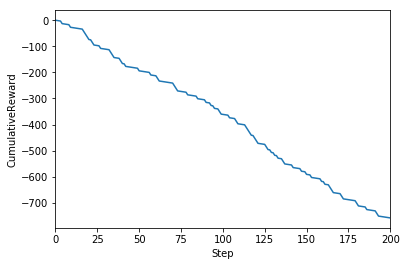

In [91]:
data.CumulativeReward.plot()
plt.xlabel("Step")
plt.ylabel("CumulativeReward")
plt.show()

where we can see that random choices are, almost always, bad decisions.

## Play until done

We have seen that random actions are far for producig a satisfactory strategy, but we need to know how far. In order to study this, we are going to unlimit the number of maximum steps of the game. With this we can study the distribution of the duration of the games. First we define a function to run the episodes

In [92]:
# Define the run of a model
def run_episode_without_policy(env):
    
    # Reset the enviroment
    state = env.reset()

    # Initialize the counters and the lists
    counter = 1
    reward = 0
    
    data = pd.DataFrame(columns = ["Counter", "StateID", "Reward", "CumulativeReward"])
    data = data.append({"Counter": 0,
                        "StateID": env.env.s,
                        "Reward": 0,
                        "CumulativeReward": reward
                        }, ignore_index=True)
    
    # Run the loop
    while reward != 20 :
    
        # Apply a random available action
        action = env.action_space.sample()
        state, reward, done, info = env.step(action = action)
    
        # Save the data
        data = data.append({"Counter": counter,
                            "StateID": observation,
                            "Reward": reward,
                            "CumulativeReward": sum(data.Reward) + reward
                           }, ignore_index=True)
    
        # Produce the next step or finish
        counter += 1
        
    results = data.iloc[-1]
    
    return results

and run 1000 episodes

In [93]:
# Initialize the counters and the lists
data_episodes = pd.DataFrame(columns = ["Counter", "CumulativeReward"])

# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode_without_policy(env)
        
    # Save the data
    data_episodes = data_episodes.append({"Counter": results[0],
                                          "CumulativeReward": results[3]
                                         }, ignore_index = True)

so we can see the distribution of the duration of the games

In [94]:
def plot_espisodes(data_episodes):
    
    plt.figure(figsize = (20,5))
    
    # Plot evolution of duration
    plt.subplot(1,2,1)
    plt.plot(data_episodes.Counter.tolist())
    plt.axhline(data_episodes.Counter.mean(), 0, 1000, c = "r", ls = "--")
    plt.xlabel("Duration")
    plt.ylabel("Counts")
    plt.title("Evolution of duration. Mean: {:0.0f}".format(data_episodes.Counter.mean()), weight = "bold")
    
    # Plot distribution of duration
    plt.subplot(1,2,2)
    sns.distplot(data_episodes.Counter.tolist(), bins = 20, kde = False)
    plt.axvline(data_episodes.Counter.mean(), 0, 500, c = "r", ls = "--")
    plt.xlabel("Duration")
    plt.ylabel("Counts")
    plt.title("Distribution of duration. Mean: {:0.0f}".format(data_episodes.Counter.mean()), weight = "bold")
    plt.show()

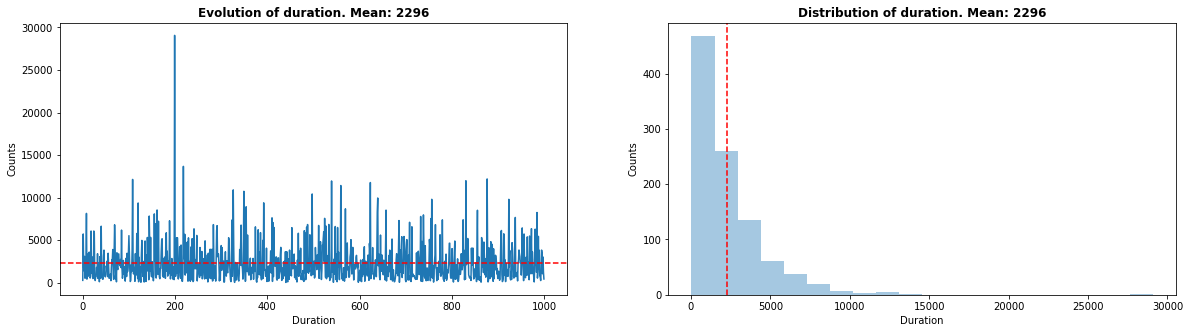

In [95]:
plot_espisodes(data_episodes)

where we can see that the durations of the games are completely random, and their distribution is approximately exponential. The mean duration of the games is very far from the 200 limit that is proposed for this enviroment.

# Dynamic programming

Now we know what our actions are doing to the environment in each step, so we want to study how to do better than take random actions.  OpenAI Gym focuses on the episodic setting of reinforcement learning, where the agent’s experience is broken down into a series of episodes. In each episode, the agent’s initial state is randomly sampled from a distribution, and the interaction proceeds until the environment reaches a terminal state. The goal in episodic reinforcement learning is to maximize the expectation of total reward per episode, and to achieve a high level of performance in as few episodes as possible.

In order to achieve this, we are going to develop some functions to implement and improve policies. A policy $\pi$ is a mapping from states to probabilities of selecting actions, so $\pi(a|s)$ denotes the probabily of chosing action $a$ in state $s$.

## Policy iteration

### Policy evaluation

First we have to develop a function that given a policy produce the corresponding value function, we can achieve this by using the Bellman equation

$$ v(s) = \sum_{s' \in \mathcal{S}} \sum_{a \in \mathcal{A}} \sum_{r \in \mathcal{R}} \pi(a|s) p(s',r|s,a) \left[ r + \gamma v(s') \right] $$

as an update rule for the value functions

$$ v_{k+1}(s) = \sum_{s' \in \mathcal{S}} \sum_{a \in \mathcal{A}} \sum_{r \in \mathcal{R}} \pi(a|s) p(s',r|s,a) \left[ r + \gamma v_k(s') \right] $$

In [96]:
def policy_eval(env, policy, discount_factor = 0.9, theta = 0.00001):
    """
    Policy evaluation algorithm. Evaluate a policy given an environment and a full description 
    of the environment's dynamics.
    
    Arguments:
        policy: [nS, nA] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        theta: threshold for the change of value function in all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        V: [nS] shaped matrix representing the value function.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all 0)
    V = np.zeros(nS)
    count = 0
    while True:
        delta = 0
        
        # Run for all states        
        for state in range(nS):
            v = 0
            
            # Use Bellman equation to improve the estimates of the value function
            for action, action_prob in enumerate(policy[state]):
                
                prob, next_state, reward, done = env.P[state][action][0]
                v += action_prob * prob * (reward + discount_factor * V[next_state])
            
            # Compute the value function change
            delta = max(delta, np.abs(v - V[state]))
            
            # Save the new value function for this state
            V[state] = v
            
        # Stop evaluating at the given threshold
        count = count + 1
        
        if (delta < theta) | (count > 1000):
            break
            print(count)
            
    return np.array(V)

and we can test it with some easy policies

In [97]:
# Uniform
policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(env, policy)
print("Value Function (uniform policy):")
print(v)

# Random
aux = np.random.rand(env.nS, env.nA)
aux2 = np.sum(aux, axis=1)
aux2 = np.expand_dims(aux2, axis=1)
aux2 = np.repeat(aux2, 6, axis=1)
policy = aux / aux2
v = policy_eval(env, policy)
print("Value Function (random policy):")
print(v)

Value Function (uniform policy):
[-31.19376376 -34.45992878 -34.39269375 -34.47853867 -39.93356124
 -39.89515104 -39.93382434 -39.93296568 -39.76404866 -39.76726191
 -39.6017157  -39.7673941  -39.97504994 -39.9747461  -39.97507976
 -39.96004189 -24.970921   -34.25405046 -34.0629539  -34.30694367
 -35.9996743  -37.48335465 -37.45281272 -37.49180834 -39.90807915
 -39.85492043 -39.90844328 -39.90725485 -39.82391789 -39.82631567
 -39.70278127 -39.82641431 -39.96716145 -39.96676121 -39.96720073
 -39.94739334 -33.02687223 -37.13738568 -37.04733177 -37.23082735
 -39.71512388 -39.82076631 -39.81859174 -39.82136823 -39.0553449
 -38.5087399  -39.0590891  -39.04686791 -39.95264059 -39.95328505
 -39.9200807  -39.95331156 -39.88700284 -39.88562366 -39.88713821
 -39.81889267 -38.45738951 -37.14360184 -38.68456285 -38.57623637
 -39.83256554 -39.89465087 -39.89337292 -39.89500461 -38.00864404
 -36.85635686 -38.0165371  -37.9907737  -39.97034847 -39.97075178
 -39.94997186 -39.97076837 -39.84404371 -39.

### Policy improvement

Our reason for computing the value function for a policy is to help find better policies. Suppose that we hace determined the value function $v_\pi$ for an arbitrary policy $\pi$, for some state $s$ we would like to know if we should change the policy to chose an action $a \neq \pi(s)$ in order to improve it. So, the idea is to find an new greedy policy $\pi'$, and for this we need to compute the all action values in a given state

In [98]:
def get_action_values(env, V, state, discount_factor = 0.9):
    """
    Compute the value for all action in a given state.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        V: [nS, nA] shaped matrix representing the value function.
        state: The state to consider.
    
    Returns:
        action_values: [nA] shaped matrix representing the value function for an state.
    """
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all zero)
    action_values = np.zeros(nA)
    
    # Use Bellman equation to improve the estimates of the action values
    for action in range(nA):
        for prob, next_state, reward, done in env.P[state][action]:
            action_values[action] += prob * (reward + discount_factor * V[next_state])
            
    return action_values

so now we can find an optimal policy by iteratively evaluating policies until an optimal policy is reached

In [123]:
def policy_improvement(env, policy_eval_fn = policy_eval, discount_factor = 0.9):
    """
    Policy Improvement Algorithm. Evaluates and improves a policy until an optimal policy is found.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        policy_eval_fn: Policy Evaluation function that takes 4 arguments: env, policy, discount_factor, theta.
        discount_factor: Gamma discount factor.
    
    Returns:
        policy: [nS, nA] shaped matrix representing the probabilities for the optimal policy.
        V: [nS, nA] shaped matrix representing the value function for the optimal policy.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with a random policy (uniform)
    policy = np.ones([nS, nA]) / nA
    
    while True:
        # Evaluate the current policy
        V = policy_eval_fn(env, policy, discount_factor)
        
        # Will be set to false if we make any changes to the policy
        policy_stable = True
        
        # Run for all states
        for state in range(nS):
            # The best action we would take under the correct policy
            chosen_action = np.argmax(policy[state])
            
            # The best action we would take under a new greedy policy
            action_values = get_action_values(env, V, state, discount_factor)
            best_action = np.argmax(action_values)
            
            # Greedily update the policy
            if chosen_action != best_action:
                policy_stable = False
            policy[state] = np.eye(nA)[best_action]
        
        # Return the policy when its stable
        if policy_stable:
            return policy, V

so we can check for our enviroment

In [100]:
policy, V = policy_improvement(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Value Function:")
print(V)
print("")

Policy Probability Distribution:
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]

Value Function:
[ 89.47366533  42.86436544  55.26465544  37.57791532  18.09428765
  42.86436544  12.75635951  21.21585667  32.82014043  18.09427775
  55.26465544  21.21585667  12.75636941  18.09427775  12.75635951
  37.57791532 100.5262988   48.7381899   62.5162899   42.86435869
  79.5262988   37.5779289   48.7381899   32.82012379  21.21587915
  48.7381899   15.28484998  24.68429352  28.53812639  15.28484998
  48.7381899   18.094271    15.28485888  21.21587024  15.28484998
  42.86435869  89.47366892  55.26466091  55.26466091  48.73818382
  55.26466892  24.68430574  32.82013601  21.21586417  32.82014402
  70.57366091  24.68430574  37.57792282  24.68431375  12.75636498
  42.86437091  15.2848439   18.09429123  24.68430574  18.09428322
  48.73818382  62.51630203  79.52629482  48.73819482  55.26465544
  48.73820203  21.21587516

Now we are goint to try our algorithm for getting an optimal policy, so running a episode with the new policy

In [101]:
# Reset the enviroment
state = env.reset()

# Initialize the counters and the lists
counter = 1
reward = 0

data = pd.DataFrame(columns = ["Counter", "StateID", "Reward", "CumulativeReward"])
data = data.append({"Counter": 0,
                    "StateID": state,
                    "Reward": 0,
                    "CumulativeReward": reward
                    }, ignore_index=True)
# Run the loop
while counter <= 200:
    
    # Apply a random available action
    action = np.argmax(policy[state])
    state, reward, done, info = env.step(action = action)
    
    # Save the data
    data = data.append({"Counter": counter,
                        "StateID": state,
                        "Reward": reward,
                        "CumulativeReward": sum(data.Reward) + reward
                        }, ignore_index=True)
    
    # Render
    print("Step {}:".format(counter))
    env.render()
        
    # Produce the next step or finish
    if done == True:
        break # Timeout of the enviroment
    else:
        counter += 1
        reward = sum(data.Reward)

Step 1:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 2:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 3:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 4:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 5:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step 6:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step 7:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step 8:
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 9:
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step 10:
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---

we can see that now the game develops as expected for a human player, and checking the cummulative reward

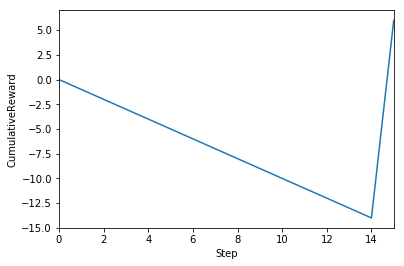

In [102]:
data.CumulativeReward.plot()
plt.xlabel("Step")
plt.ylabel("CumulativeReward")
plt.show()

we can see that now it reaches positive values.

In order to study the check this in a bigger scale we redefine the function that runs a episode in order to add the new policy function to select the optimal action in each state

In [103]:
# Define the run of a model
def run_episode(env, policy):
    
    # Reset the enviroment
    state = env.reset()

    # Initialize the counters and the lists
    counter = 1
    reward = 0
    
    data = pd.DataFrame(columns = ["Counter", "StateID", "Reward", "CumulativeReward"])
    data = data.append({"Counter": 0,
                        "StateID": env.env.s,
                        "Reward": 0,
                        "CumulativeReward": reward
                        }, ignore_index=True)
    
    # Run the loop
    while reward != 20 :
    
        # Apply a random available action
        action = np.argmax(policy[state])
        state, reward, done, info = env.step(action = action)
    
        # Save the data
        data = data.append({"Counter": counter,
                            "StateID": state,
                            "Reward": reward,
                            "CumulativeReward": sum(data.Reward) + reward
                           }, ignore_index=True)
    
        # Produce the next step or finish
        counter += 1
        
    results = data.iloc[-1]
    
    return results

and check the distributions of the durations

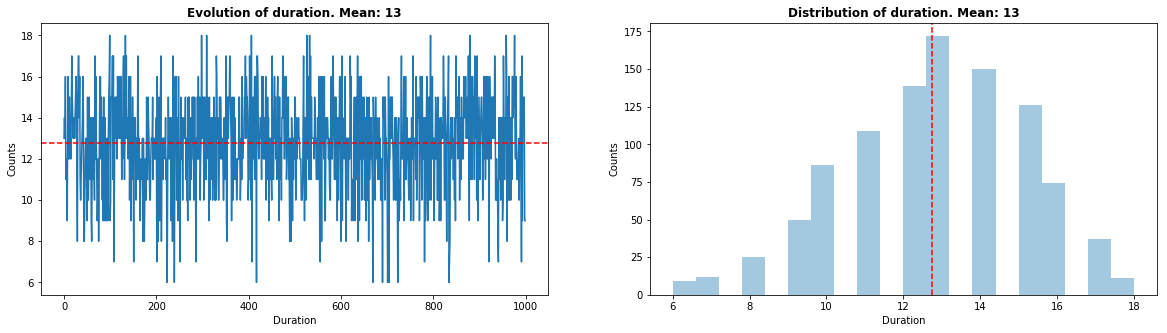

In [104]:
# Initialize the counters and the lists
data_episodes = pd.DataFrame(columns = ["Counter", "CumulativeReward"])

# Obtain the optimal policy for this enviroment
policy, V = policy_improvement(env)
    
# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode(env, policy)
        
    # Save the data
    data_episodes = data_episodes.append({"Counter": results[0],
                                          "CumulativeReward": results[3]
                                         }, ignore_index = True)
    
plot_espisodes(data_episodes)

so we can see that the duration of an episode has decreased very dramatically.

## Value iteration

One thowback of the policy iteration algorithm is that it involves a policy evaluation in each of the iterations, which can be very computationaly expensive. We can truncate the policy evaluation without losing the convergence guarantied by policy iteration algorithm. This can be done simply changing the update rule for the value function to

$$ v_{k+1}(s) = \max_a \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r|s,a) \left[ r + \gamma v_k(s') \right] $$

this is known as Value Iteration algorithm and is based simply in the assumption of a greedy policy, which is true in the final optimal case.

In [105]:
def value_iteration(env, discount_factor = 0.9, theta = 0.00001):
    """
    Value Iteration Algorithm. Evaluates and improves the value function until an optimal value function is found.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
        policy_eval_fn: Policy Evaluation function that takes 4 arguments: env, policy, discount_factor, theta.
        discount_factor: Gamma discount factor.
    
    Returns:
        policy: [nS, nA] shaped matrix representing the probabilities for the optimal policy.
        V: [nS, nA] shaped matrix representing the value function for the optimal policy.
    """
    
    # Definitions
    nS = env.nS # Number of states
    nA = env.nA # Number of actions
    
    # Start with random values (all 0)
    V = np.zeros(nS)
    count = 0
    while True:
        delta = 0
        
        # Run for all states        
        for state in range(nS):
            # Obtain the action values for this state and keep the best
            action_values = get_action_values(env, V, state, discount_factor)
            v = np.max(action_values)            

            # Compute the value function change
            delta = max(delta, np.abs(v - V[state]))
            
            # Save the new value function for this state
            V[state] = v
            
        # Stop evaluating at the given threshold
        count = count + 1
        
        if (delta < theta) | (count > 1000):
            break
            print(count)
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.env.nS, env.env.nA])
    for state in range(nS):
        # Obtain the action values for this state and keep the best
        action_values = get_action_values(env, V, state, discount_factor)
        best_action = np.argmax(action_values)
        
        # Always take the best action
        policy[state, best_action] = 1.0
            
    return policy, np.array(V)

and checking the distribution again

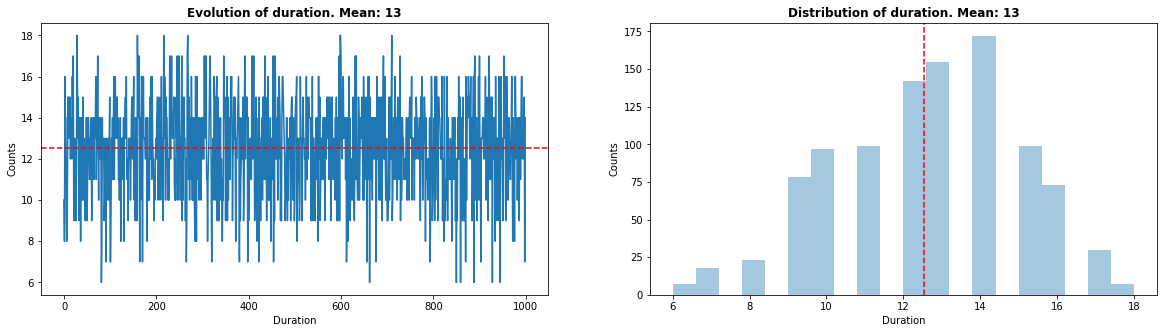

In [106]:
# Initialize the counters and the lists
counter_episodes = 0
data_episodes = pd.DataFrame(columns = ["Counter", "CumulativeReward"])

# Obtain the optimal policy for this enviroment
policy, V = value_iteration(env)
    
# Run the loop
for counter_episodes in range(1000):
    
    # Run a episode
    results = run_episode(env, policy)
        
    # Save the data
    data_episodes = data_episodes.append({"Counter": results[0],
                                          "CumulativeReward": results[3]
                                         }, ignore_index = True)
    
plot_espisodes(data_episodes)

we can see that we obtain exactly the same results but with a faster computation time.

# MonteCarlo 

# Temporal difference methods

## Q-learning